In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('ds_salaries.csv')
raw_data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
raw_data.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755,3755,3755,3.755000e+03,3755,3755.000000,3755,3755.000000,3755,3755
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,2516,3718,1040,NaN,3224,NaN,3004,NaN,3040,3153
mean,2022.373635,NaN,NaN,NaN,1.906956e+05,NaN,137570.389880,NaN,46.271638,NaN,NaN
std,0.691448,NaN,NaN,NaN,6.716765e+05,NaN,63055.625278,NaN,48.589050,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.000000e+05,NaN,95000.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.380000e+05,NaN,135000.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.800000e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


In [4]:
raw_data = raw_data.drop(['salary', 'salary_currency'], axis=1)
raw_data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [5]:
raw_data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
data_no_mv = raw_data.dropna(axis=0)

<ipython-input-7-9330910ebd6f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['salary_in_usd'])


<Axes: xlabel='salary_in_usd', ylabel='Density'>

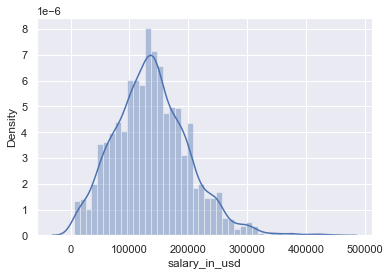

In [7]:
sns.distplot(data_no_mv['salary_in_usd'])

In [8]:
data_no_mv['log_salary'] = np.log(data_no_mv['salary_in_usd'])

In [9]:
q = data_no_mv['salary_in_usd'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['salary_in_usd']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,log_salary
count,3716.000000,3716,3716,3716,3716.000000,3716,3716.000000,3716,3716,3716.000000
unique,NaN,4,4,92,NaN,77,NaN,72,3,NaN
top,NaN,SE,FT,Data Engineer,NaN,US,NaN,US,M,NaN
freq,NaN,2493,3680,1031,NaN,2967,NaN,3003,3126,NaN
mean,2022.373520,NaN,NaN,NaN,135330.369483,NaN,46.219053,NaN,NaN,11.683588
std,0.688993,NaN,NaN,NaN,59301.774055,NaN,48.585310,NaN,NaN,0.587556
min,2020.000000,NaN,NaN,NaN,5132.000000,NaN,0.000000,NaN,NaN,8.543251
25%,2022.000000,NaN,NaN,NaN,95000.000000,NaN,0.000000,NaN,NaN,11.461632
50%,2022.000000,NaN,NaN,NaN,134368.000000,NaN,0.000000,NaN,NaN,11.808337
75%,2023.000000,NaN,NaN,NaN,175000.000000,NaN,100.000000,NaN,NaN,12.072541


In [10]:
data_1 = data_1.drop('salary_in_usd', axis=1)

In [11]:
data_dummies = pd.get_dummies(data_1, drop_first=True)

In [12]:
data_dummies

,work_year,remote_ratio,log_salary,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Developer,...,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,2023,100,11.360322,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2023,100,10.308953,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,2023,100,10.146434,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,2023,100,12.072541,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2023,100,11.695247,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3749,2021,100,12.013701,False,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3751,2021,100,11.925035,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3752,2020,100,11.561716,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3753,2020,100,11.512925,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [17]:
vif_data = data_dummies.copy()
vif_data = vif_data.astype(float)  # convert all columns to float

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
vif["Features"] = vif_data.columns

# Sort to find most problematic variables
vif.sort_values('VIF', ascending=False)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,Features
124,inf,employee_residence_EG
94,inf,job_title_Product Data Scientist
154,inf,employee_residence_NG
153,inf,employee_residence_MY
152,inf,employee_residence_MX
...,...,...
67,2.141541,job_title_Head of Machine Learning
87,2.129113,job_title_Power BI Developer
89,2.126577,job_title_Principal Data Architect
248,2.054014,company_size_S


In [21]:
# 1. Convert all columns to float for VIF
vif_data = data_dummies.astype(float)

# 2. Calculate VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
vif["Features"] = vif_data.columns

# Display full VIF DataFrame without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display VIFs sorted by highest
display(vif.sort_values('VIF', ascending=False))



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,Features
124,inf,employee_residence_EG
94,inf,job_title_Product Data Scientist
154,inf,employee_residence_NG
153,inf,employee_residence_MY
152,inf,employee_residence_MX
151,inf,employee_residence_MT
100,inf,employee_residence_AM
101,inf,employee_residence_AR
102,inf,employee_residence_AS
103,inf,employee_residence_AT


In [22]:
data_no_multicollinearity = data_dummies.drop(['work_year'], axis=1)

In [23]:
targets = data_no_multicollinearity['log_salary']
inputs = data_no_multicollinearity.drop(['log_salary'], axis=1)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)


In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

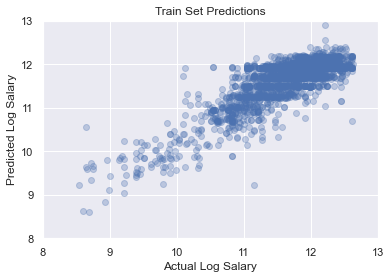

In [27]:
y_hat_train = reg.predict(x_train)

plt.scatter(y_train, y_hat_train, alpha=0.3)
plt.xlabel('Actual Log Salary')
plt.ylabel('Predicted Log Salary')
plt.title('Train Set Predictions')
plt.xlim(8, 13)
plt.ylim(8, 13)
plt.show()


Text(0.5, 1.0, 'Train Residuals')

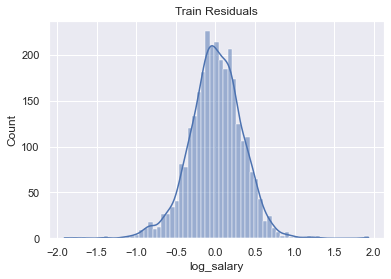

In [28]:
sns.histplot(y_train - y_hat_train, kde=True)
plt.title("Train Residuals")


In [29]:
reg.score(x_train, y_train)


0.6837862630471212

In [30]:
reg_summary = pd.DataFrame(inputs.columns, columns=['Feature'])
reg_summary['Weight'] = reg.coef_
reg_summary.sort_values('Weight', ascending=False)


,Feature,Weight
195,company_location_DZ,7.316735e+12
141,employee_residence_KE,6.279565e+12
116,employee_residence_CZ,6.252722e+12
168,employee_residence_TN,4.421937e+12
136,employee_residence_IQ,4.241574e+12
170,employee_residence_UA,3.539680e+12
100,employee_residence_AS,2.889276e+12
222,company_location_MK,2.750843e+12
196,company_location_EE,2.683844e+12
137,employee_residence_IR,2.479753e+12


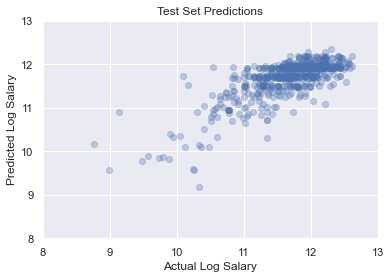

In [31]:
y_hat_test = reg.predict(x_test)

plt.scatter(y_test, y_hat_test, alpha=0.3)
plt.xlabel('Actual Log Salary')
plt.ylabel('Predicted Log Salary')
plt.title('Test Set Predictions')
plt.xlim(8, 13)
plt.ylim(8, 13)
plt.show()


In [32]:
df_eval = pd.DataFrame({
    'Prediction': np.exp(y_hat_test),
    'Target': np.exp(y_test.reset_index(drop=True))
})
df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference%'] = abs(df_eval['Residual'] / df_eval['Target']) * 100
df_eval.describe()


<ipython-input-32-3bd0de2fdaba>:2: RuntimeWarning: overflow encountered in exp
  'Prediction': np.exp(y_hat_test),


,Prediction,Target,Residual,Difference%
count,7.440000e+02,744.000000,7.440000e+02,744.000000
mean,inf,133102.157258,-inf,inf
std,NaN,57187.219181,NaN,NaN
min,0.000000e+00,5409.000000,-inf,0.064316
25%,1.098879e+05,93437.500000,-2.410136e+04,11.046403
50%,1.483347e+05,130000.000000,-6.837019e+02,21.881342
75%,1.540743e+05,170000.000000,3.098667e+04,36.928064
max,inf,300240.000000,1.900000e+05,inf
